# Experiment 0-D

This experiment used 483 texts scraped from JSTOR, which have 280 files with text matches. In an effort to make the corpus more diachronic, some of these texts were scraped from decade-based searches, i.e. a search for the keyword "Middlemarch" in articles from 1930 to 1939. This experiment was conducted with text-matcher 0.1.4, which fixes the issue with matches cutting off too early. It also uses a threshold of 6 words, in an attempt to avoid false positives. 

In [1]:
import pandas as pd
%matplotlib inline
from ast import literal_eval
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [16, 6]

In [2]:
# Read in the experiment results from the text-matcher log file. 
df = pd.read_csv('e0d/log.txt')

In [3]:
def getDate(filename): 
    """
    Extract dates from filenames. 
    """
    m = re.search('_(\d{4})_', filename)
    if m is not None: 
        return int(m.group(1))
    else:
        return None

df['Date'] = df['Text B'].apply(getDate)
df['Decade'] = df['Date'] - (df['Date'] % 10)

In [4]:
df.head()

,Text A,Text B,Threshold,N-Grams,Num Matches,Text A Length,Text B Length,Locations in A,Locations in B,Date,Decade
0,middlemarch.txt,e0b/e0b-txt/WOLFE_2002_IRIS MURDOCH APPLIED TO...,6,3,17,1793446,43119,"[(539109, 539353), (539391, 539432), (539504, ...","[(26234, 26478), (26481, 26521), (26567, 26802...",2002.0,2000.0
1,middlemarch.txt,e0b/e0b-txt/Hardy_1954_The Moment of Disenchan...,6,3,3,1793446,20226,"[(580711, 580936), (580948, 581020), (1691325,...","[(9662, 9886), (9897, 9969), (19879, 20002)]",1954.0,1950.0
2,middlemarch.txt,e0b/e0b-txt/MORRIS_1990_THE DIALOGIC UNIVERSE ...,6,3,21,1793446,47530,"[(1615, 1964), (29948, 30025), (40132, 40256),...","[(4254, 4605), (5612, 5690), (6239, 6364), (75...",1990.0,1990.0
3,middlemarch.txt,e0b/e0b-txt/Guth_1999_George Eliot and Schille...,6,3,5,1793446,46745,"[(8798, 8850), (8870, 8930), (83611, 83687), (...","[(18049, 18101), (18127, 18188), (19244, 19319...",1999.0,1990.0
4,middlemarch.txt,e0b/e0b-txt/Payne_1999_The Serialist Vanishes.txt,6,3,4,1793446,60072,"[(345200, 345488), (1608886, 1609417), (161169...","[(4009, 4298), (25511, 26041), (26698, 26767),...",1999.0,1990.0


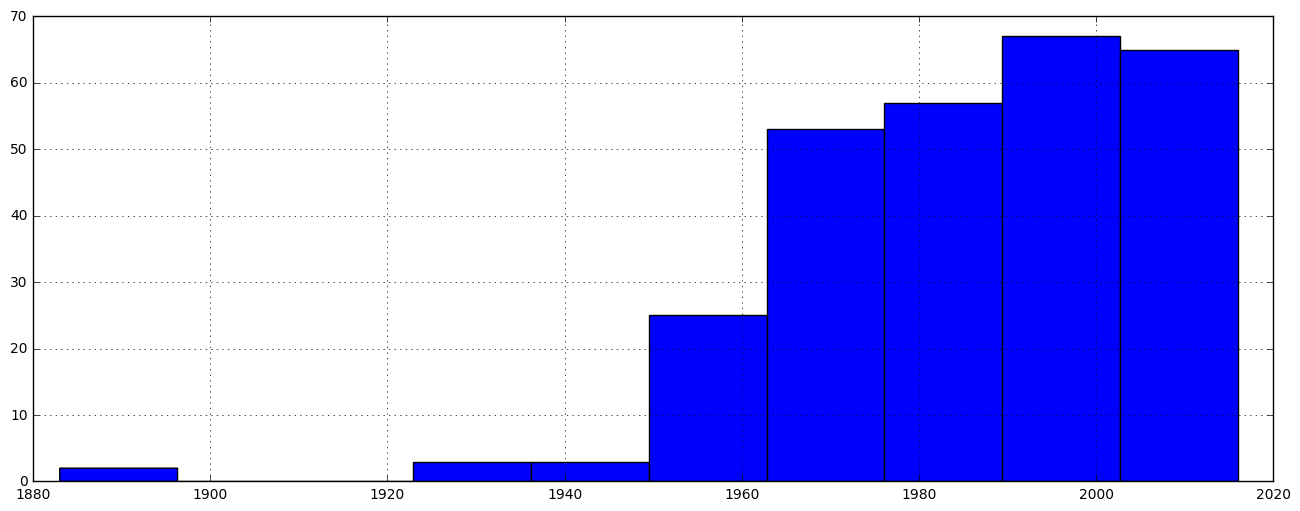

In [5]:
df['Date'].hist()

In [6]:
textALength = df['Text A Length'][0]
textALength

1793446

In [7]:
decades = np.arange(1950, 2020, 10)

In [8]:
# Make a dictionary of decades. 
# Values are a list of locations.  
decadeDict = {}
for i, row in df.iterrows():
    decade = row['Decade']
    locations = literal_eval(row['Locations in A'])
    if decade not in decadeDict: 
        decadeDict[decade] = locations
    else: 
        decadeDict[decade] += locations 

In [9]:
# Grab the beginnings of quotes. 
decadeStarts = {decade: [item[0] for item in loc] for decade, loc in decadeDict.items()}

In [10]:
decadesBinned = {decade: 
                 np.histogram(locations, bins=50, range=(0, textALength))[0]
                 for decade, locations in decadeStarts.items() if decade in decades}

In [11]:
decadesDF = pd.DataFrame(decadesBinned).T

In [12]:
decadesDF

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1950.0,5,5,0,1,0,2,0,0,0,0,...,0,0,4,6,3,1,0,44,5,4
1960.0,6,3,1,5,2,4,0,0,12,4,...,2,0,0,5,0,8,3,17,3,11
1970.0,40,19,3,22,6,5,3,0,10,15,...,0,2,0,2,9,1,1,18,2,17
1980.0,31,13,5,6,3,6,6,7,38,7,...,0,0,1,11,10,13,1,15,0,26
1990.0,35,13,12,4,3,12,2,12,51,16,...,0,2,8,1,9,2,15,32,8,19
2000.0,45,10,10,1,19,10,2,6,11,6,...,0,5,7,2,4,3,6,7,6,8
2010.0,47,3,5,2,10,0,2,1,9,5,...,2,0,1,4,7,3,7,6,1,21


In [13]:
#Normalize
decadesDF = decadesDF.div(decadesDF.max(axis=1), axis=0)

In [14]:
ylabels = [str(int(decade)) for decade in decadesDF.index] + ['2020']

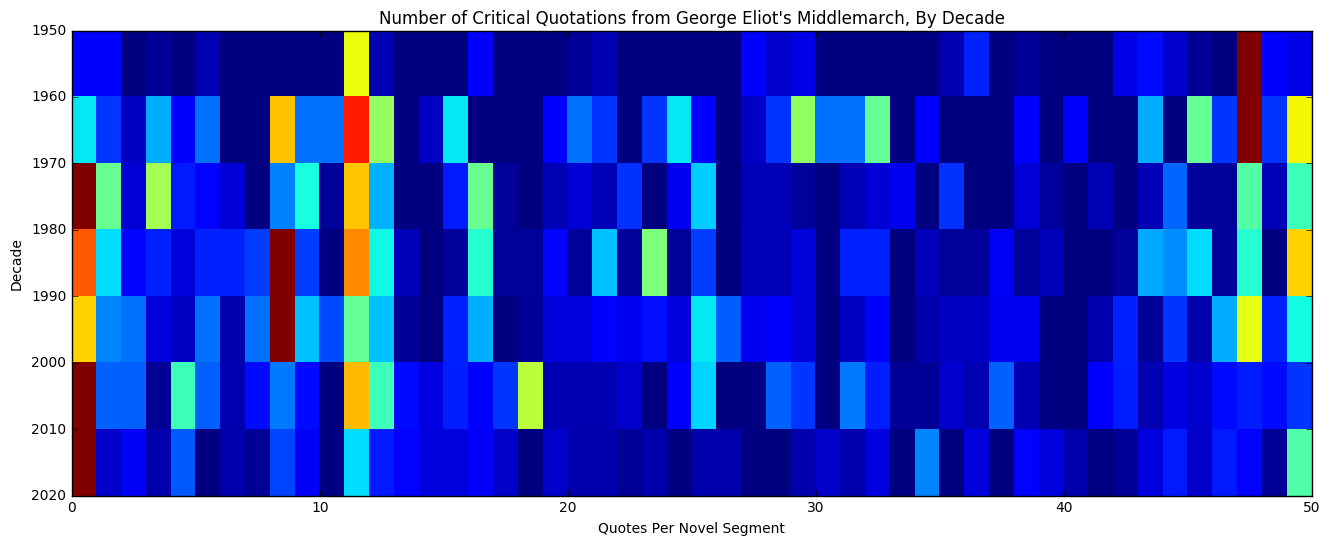

In [15]:
plt.pcolor(decadesDF)
plt.yticks(np.arange(len(decadesDF.index)+1), ylabels)
plt.gca().invert_yaxis()
plt.ylabel('Decade')
plt.xlabel('Quotes Per Novel Segment')
plt.title("Number of Critical Quotations from George Eliot's Middlemarch, By Decade")
#plt.xticks(np.arange(len(decadesDF.columns)), decadesDF.columns)
plt.show()

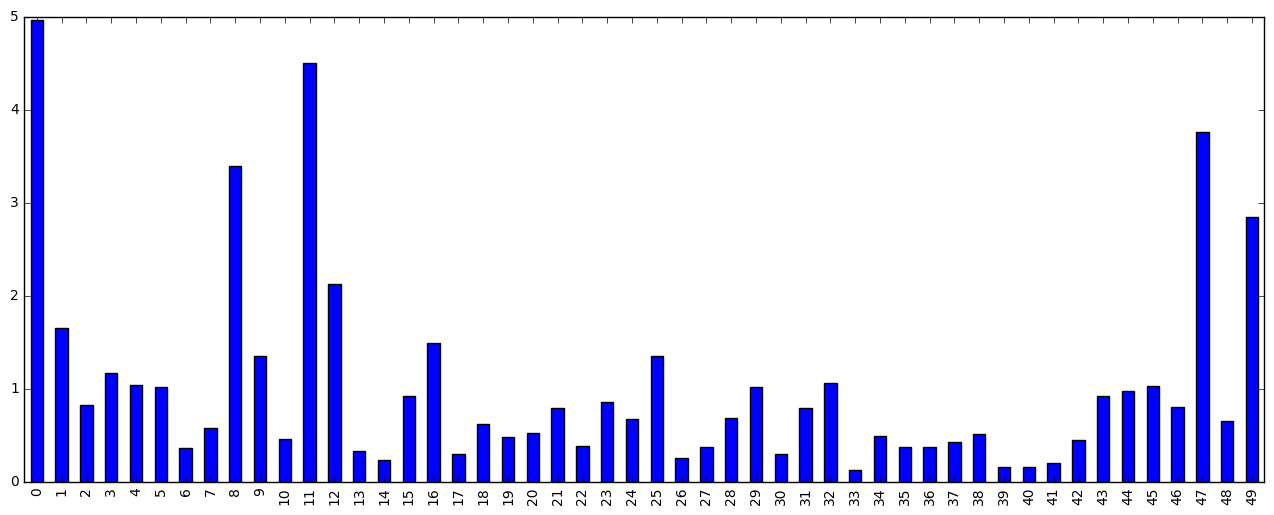

In [16]:
decadesDF.sum().plot(kind='bar')